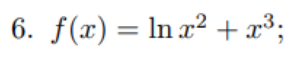

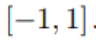

In [38]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random
import pandas as pd

narray = np.array([1,2,3,4,5,10])
ErrN =narray*0
ErrO = narray*0


In [39]:
# проверяем, есть ли на главной диагонали нули (для метода Гаусса)
def no0(M, k):
    n =  M.shape[0]
    while k < n and not M[k, k]:
        k += 1
    return k

In [40]:
def Gauss(A,b):
        M = np.hstack((A, b)) # "склейка" матрицы коэффициентов при переменных и вектора свободных членов
        n = M.shape[0] 
        for k in range(n): 
            # убираем нули с главной диагонали, если они есть
            k0 = no0(M, k)
            
            if k0 != k and M[k,k] == max(M[:,k]):
                M[k0], M[k] = M[k].copy(), M[k0]   
            if M[k, k] != 1:
                M[k, :] *= 1 / M[k, k]
            # прямой ход метода Гаусса
            for r in range(k + 1, n):
                M[r, :] -= M[k, :] * M[r, k]
        
        #обратный ход метода Гаусса
        for k in range(n - 1, 0, -1):
            for r in range(k - 1, -1, -1):
                if M[r, k]:
                    M[r, :] -= M[k, :] * M[r, k]
        if b.shape[1] > 1:
            return np.hsplit(M,2)[1]
        return  (M[:,n])

In [53]:
#вычисление функции с погрешностью 
def my_f1(x):
    return [(m.log(i*i) + i*i*i - 0.5*random.random()) for i in x]
def my_f2(x):
    return [(m.log(i*i) + i*i*i + 0.5*random.random()) for i in x]
def my_f3(x):
    return [(m.log(i*i) + i*i*i + 0.3*random.random()) for i in x]



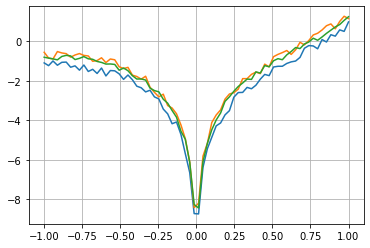

In [54]:
x = np.linspace(-1, 1, 70)
plt.grid()
plt.plot(x,my_f1(x),x,my_f2(x),x,my_f3(x),)

Нормальные уравнения

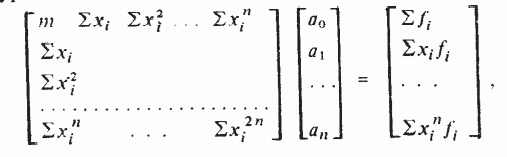

In [43]:
def gena(x,f,n,mm):  
    summ = np.zeros((2*n,1))
    fx = np.zeros((n+1,1))
    for i in range(n*2):
        for j in range(len(x)):
            summ[i,0] += x[j]**(i+1)
    for i in range(n+1):
        for j in range(len(x)):
            fx[i,0] += f[j]*x[j]**i
    A = np.zeros((n+1,n+1))
    for i in range(n+1):
        for j in range(n+1):
            for k in range(2*n):
                if i+j == k:
                    A[i,j] = summ[k-1,0]
    A[0,0] = mm
    A[n,n] = summ[-1,0]
    a = Gauss(A,fx)
    plt.plot(x,f,'*')
    return a

In [44]:
def Poly(t,xx,n,mm,ErrN):
    ans = t*0
    a = gena(xx,f,n,mm)
    for j in range(len(t)):
        for i in range(len(a)):
            ans[j] += a[i]*t[j]**i
    summer = 0
    ans3 = np.hstack((ans,ans,ans))
    for i in range(len(xx)):
        summer +=((ans3[i]) - (f[i]))**2
    for i in range(len(ErrN)):
        if ErrN[i] == 0: 
            ErrN[i] = summer
            break
    return ans,ErrN
t = np.linspace(-1, 1, 70 )

Ортогональные уравнения

In [45]:
del t

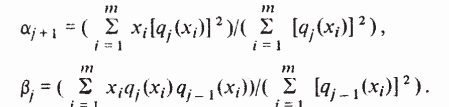

In [46]:
def alfa(x,j,q):
    s1 = 0
    s2 = 0
    for xi in x:
        s2 += q[j-1,0].subs(t,xi)**2
        s1 += xi*q[j-1,0].subs(t,xi)**2
       
    return s1/s2

In [47]:
def bet(x,j,q):
    s1 = 0
    s2 = 0
    for xi in x:
        s1 += xi*q[j,0].subs(t,xi)*q[j-1,0].subs(t,xi)
        s2 += (q[j-1,0].subs(t,xi))**2
    return s1/s2

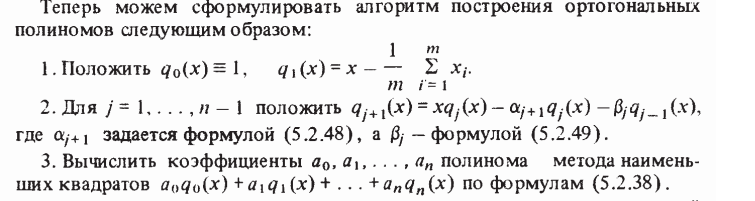

In [48]:
sp.var('t')
def genq(n,mm,x):
    q = np.zeros((n+1,1))
    q = sp.Matrix(q)
    q[0,0] = 1
    
    q[1,0] = t - sum(x)/len(x)
    for i in range(1,n):
        q[i+1,0] = sp.simplify(t*q[i,0] + alfa(x,i+1,q)*q[i,0] - bet(x,i,q)*q[i-1,0])
    return q


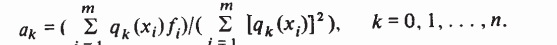

In [49]:
def Ort(x,xx,f,n,mm,ErrO):
    plt.plot(xx,f,'*')
    a = np.zeros((n,1))
    s1 = np.zeros((n,1))
    s2 =np.zeros((n,1))
    q = genq(n,mm,xx)
    for i in range(n):
        for j in range(mm):
            s1[i,0] += (q[i,0].subs(t,xx[j]))*f[j]
            s2[i,0] += q[i,0].subs(t,xx[j])**2
    for i in range(n):
        a[i,0] = s1[i,0]/s2[i,0]
    ans = x*0
    
    for j in range(len(x)):
        for i in range(len(a)):
            ans[j] += a[i,0]*q[i,0].subs(t,x[j])
    summer = 0
    ans3 = np.hstack((ans,ans,ans))
    for i in range(len(xx)):
        summer += ((ans3[i]) - (f[i]))**2
    for i in range(len(ErrO)):
        if ErrO[i] == 0: 
            ErrO[i] = summer
            break
    return ans,ErrO
    

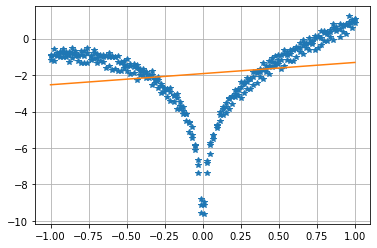

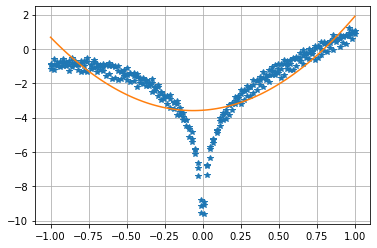

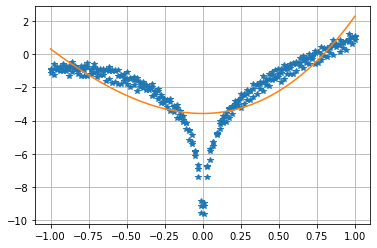

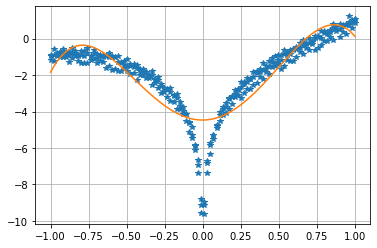

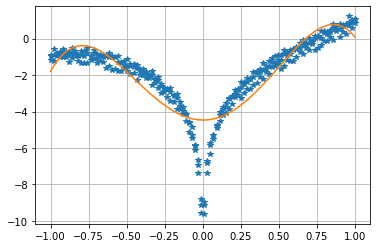

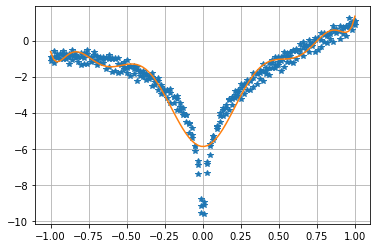

In [50]:
x = np.linspace(-1, 1, 100 )
f1 = my_f1(x)
f2 = my_f2(x)
f3 = my_f3(x)
f = np.hstack((f1,f2,f3))
xx = np.hstack((x,x,x))
for i in narray:
    plt.grid()
    y,ErrN = Poly(x,xx,i,300,ErrN)
    plt.plot(x,y)
    plt.show()

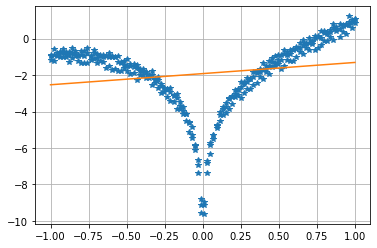

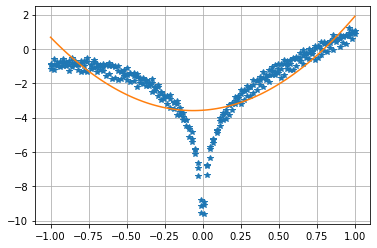

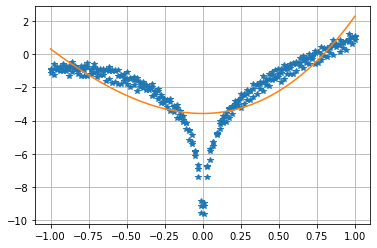

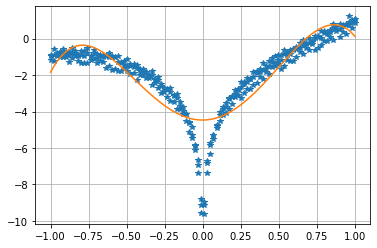

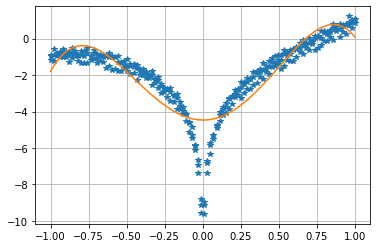

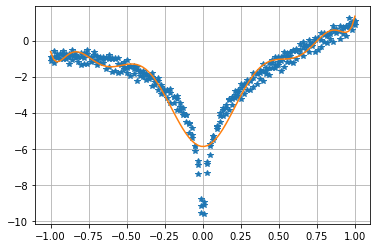

In [51]:

for i in narray:
    plt.grid()
    y,ErrO = Ort(x,xx,f,i+1,300,ErrO)
    plt.plot(x,y)
    plt.show()

In [52]:
out_table = pd.DataFrame({'n':narray,'ErrNorm':ErrN,'ErrOrt':ErrO})
print(out_table)

    n  ErrNorm  ErrOrt
0   1     1149    1149
1   2      492     492
2   3      485     485
3   4      297     297
4   5      297     297
5  10      134     134
